# Semana 9

## FSC5705 - Física Computacional
## 08/05/2024

### Atenção
- **Não esqueça de reiniciar o kernel e rodar todas as células para testar o notebook antes de enviar.**

### Funções de Bessel do primeiro tipo

As funções de Bessel do primeiro tipo, na sua forma integral, são dadas por

$$
J_m(x) = \frac 1 \pi \int_0^\pi \cos \left( m\theta - x \sin \theta \right)\ \mathrm{d}\theta,
$$

onde $m$ é um inteiro não negativo, e $x \geq 0$.

#### Item 1

Escreva uma função que calcule o valor de $J_m(x)$ usando o método de quadratura gaussiana (use $N=20$).

In [2]:
import numpy as np
from scipy.special import roots_legendre

In [3]:
def f(t, x, m):
    return np.cos(m * t - x * np.sin(t))

def J(x,m):
    
    N = 20
    a = 0
    b = np.pi
    I = 0.0
    u_k, _w_k = roots_legendre(N)
    for k in range(N):
        t_k = 0.5 * (b-a) * u_k[k] + 0.5 * (b+a)
        w_k = 0.5 * (b-a) * _w_k[k]
        I = I + w_k * f(t_k, x, m)
        
    return I/np.pi

#### Item 2

Use sua função para fazer um gráfico comparando $J_0$, $J_1$ e $J_2$ (no mesmo gráfico), com $0 \leq x \leq 20$.

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'stix'

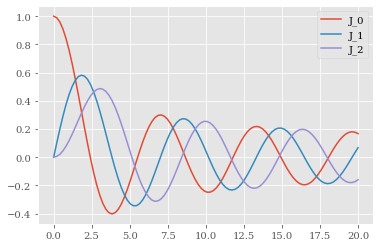

In [31]:
N = []
I_0 = []
I_1 = []
I_2 = []
    
fig, ax = plt.subplots()
x = np.linspace(0,20,100)
for i in range(0, len(x)):
    I_0.append(J(x[i],0))
    I_1.append(J(x[i],1))
    I_2.append(J(x[i],2))
ax.plot(x,I_0, label="J_0")
ax.plot(x,I_1, label="J_1")
ax.plot(x,I_2, label="J_2")
ax.legend()
plt.show()